In [0]:
!wget "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

In [0]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [0]:
!tar -xf 'cifar-10-python.tar.gz'

In [1]:
# !cd cifar-10-batches-py
# cd cifar-10-batches-py/
# !pwd
# cd data_batch_1
# cd ../..
ls

cifar-10-batches-py/  cifar-10-python.tar.gz  datalab/


In [0]:
def processImages(images):
  pro_data = []
  for i in range(len(images)):
    img_R = images[i][0:1024].reshape((32, 32))
    img_G = images[i][1024:2048].reshape((32, 32))
    img_B = images[i][2048:3072].reshape((32, 32))
    img = np.dstack((img_R, img_G, img_B))
    r_img = cv2.resize(img, (224,224))
    pro_data.append(r_img)
  return np.array(pro_data)


In [0]:
import pickle
import numpy as np
import cv2
file = '/content/cifar-10-batches-py/data_batch_1'
with open(file, 'rb') as fo:
  dict = pickle.load(fo, encoding='latin1')

In [4]:
from keras.utils import to_categorical
from sklearn.utils import shuffle
imageTrain, encodedTrain = shuffle(processImages(dict['data']),to_categorical(dict['labels']))

Using TensorFlow backend.


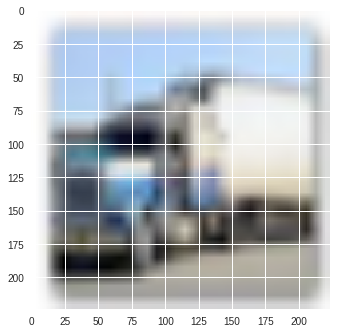

(224, 224, 3)


In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf

rnd = np.random.randint(0,len(imageTrain))
plt.imshow(imageTrain[rnd]/255.0)
plt.show()
# print(sess.run(tf.argmax(encodedTrain[rnd])))
print(imageTrain[rnd].shape)
 

In [0]:
n_classes = 10
diemension = 3
mu = 0
sigma = 0.1


x = tf.placeholder(tf.float32,shape=[None,224,224,3])
y = tf.placeholder(tf.float32,shape=[None,n_classes])


In [8]:
# Convolution 1
weights_l1 = tf.Variable(tf.truncated_normal([3,3,3,64], mean=mu , stddev=sigma))
biases_l1 = tf.Variable(tf.truncated_normal([64]))

outlayer = tf.nn.conv2d(x, weights_l1, [1,1,1,1], padding="SAME")
outlayer += biases_l1
outlayer = tf.nn.relu(outlayer)
print(outlayer)

Tensor("Relu:0", shape=(?, 224, 224, 64), dtype=float32)


In [9]:
# Convolution 2
weights_l2 = tf.Variable(tf.truncated_normal([3,3,64,64], mean=mu , stddev=sigma))
biases_l2 = tf.Variable(tf.truncated_normal([64]))


outlayer = tf.nn.conv2d(outlayer, weights_l2, [1,1,1,1], padding="SAME")
outlayer += biases_l2
outlayer = tf.nn.relu(outlayer)
print(outlayer)

Tensor("Relu_1:0", shape=(?, 224, 224, 64), dtype=float32)


In [10]:
# MaxPooling 1
outlayer = tf.nn.max_pool(outlayer, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
print(outlayer)

Tensor("MaxPool:0", shape=(?, 112, 112, 64), dtype=float32)


In [11]:
# Convolution 3
weights_l3 = tf.Variable(tf.truncated_normal([3,3,64,128], mean=mu , stddev=sigma))
biases_l3 = tf.Variable(tf.truncated_normal([128]))


outlayer = tf.nn.conv2d(outlayer, weights_l3, [1,1,1,1], padding="SAME")
outlayer += biases_l3
outlayer = tf.nn.relu(outlayer)
print(outlayer)

Tensor("Relu_2:0", shape=(?, 112, 112, 128), dtype=float32)


In [12]:
# Convolution 4
weights_l4 = tf.Variable(tf.truncated_normal([3,3,128,128], mean=mu , stddev=sigma))
biases_l4 = tf.Variable(tf.truncated_normal([128]))


outlayer = tf.nn.conv2d(outlayer, weights_l4, [1,1,1,1], padding="SAME")
outlayer += biases_l4
outlayer = tf.nn.relu(outlayer)
print(outlayer)

Tensor("Relu_3:0", shape=(?, 112, 112, 128), dtype=float32)


In [13]:
# MaxPooling 2
outlayer = tf.nn.max_pool(outlayer, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
print(outlayer)

Tensor("MaxPool_1:0", shape=(?, 56, 56, 128), dtype=float32)


### **Convolutional Layer 3**

In [14]:
# Convolution 5
weights_l5 = tf.Variable(tf.truncated_normal([3,3,128,256], mean=mu , stddev=sigma))
biases_l5 = tf.Variable(tf.truncated_normal([256]))


outlayer = tf.nn.conv2d(outlayer, weights_l5, [1,1,1,1], padding="SAME")
outlayer += biases_l5
outlayer = tf.nn.relu(outlayer)
print(outlayer)

Tensor("Relu_4:0", shape=(?, 56, 56, 256), dtype=float32)


In [15]:
# Convolution 6
weights_l6 = tf.Variable(tf.truncated_normal([3,3,256,256], mean=mu , stddev=sigma))
biases_l6 = tf.Variable(tf.truncated_normal([256]))


outlayer = tf.nn.conv2d(outlayer, weights_l6, [1,1,1,1], padding="SAME")
outlayer += biases_l6
outlayer = tf.nn.relu(outlayer)
print(outlayer)

Tensor("Relu_5:0", shape=(?, 56, 56, 256), dtype=float32)


In [16]:
# Convolution 7
weights_l7 = tf.Variable(tf.truncated_normal([3,3,256,256], mean=mu , stddev=sigma))
biases_l7 = tf.Variable(tf.truncated_normal([256]))


outlayer = tf.nn.conv2d(outlayer, weights_l7, [1,1,1,1], padding="SAME")
outlayer += biases_l7
outlayer = tf.nn.relu(outlayer)
print(outlayer)

Tensor("Relu_6:0", shape=(?, 56, 56, 256), dtype=float32)


In [17]:
# MaxPooling 1
outlayer = tf.nn.max_pool(outlayer, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
print(outlayer)

Tensor("MaxPool_2:0", shape=(?, 28, 28, 256), dtype=float32)


### **Convolutional 4**

In [18]:
# Convolution 8
weights_l8 = tf.Variable(tf.truncated_normal([3,3,256,512], mean=mu , stddev=sigma))
biases_l8 = tf.Variable(tf.truncated_normal([512]))


outlayer = tf.nn.conv2d(outlayer, weights_l8, [1,1,1,1], padding="SAME")
outlayer += biases_l8
outlayer = tf.nn.relu(outlayer)
print(outlayer)

Tensor("Relu_7:0", shape=(?, 28, 28, 512), dtype=float32)


In [19]:
# Convolution 9
weights_l9 = tf.Variable(tf.truncated_normal([3,3,512,512], mean=mu , stddev=sigma))
biases_l9 = tf.Variable(tf.truncated_normal([512]))


outlayer = tf.nn.conv2d(outlayer, weights_l9, [1,1,1,1], padding="SAME")
outlayer += biases_l9
outlayer = tf.nn.relu(outlayer)
print(outlayer)

Tensor("Relu_8:0", shape=(?, 28, 28, 512), dtype=float32)


In [20]:
# Convolution 10
weights_l10 = tf.Variable(tf.truncated_normal([3,3,512,512], mean=mu , stddev=sigma))
biases_l10 = tf.Variable(tf.truncated_normal([512]))


outlayer = tf.nn.conv2d(outlayer, weights_l10, [1,1,1,1], padding="SAME")
outlayer += biases_l10
outlayer = tf.nn.relu(outlayer)
print(outlayer)

Tensor("Relu_9:0", shape=(?, 28, 28, 512), dtype=float32)


In [21]:
# MaxPooling 4
outlayer = tf.nn.max_pool(outlayer, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
print(outlayer)

Tensor("MaxPool_3:0", shape=(?, 14, 14, 512), dtype=float32)


### **Colvolutional 5**

In [22]:
# Convolution 11
weights_l11 = tf.Variable(tf.truncated_normal([3,3,512,512], mean=mu , stddev=sigma))
biases_l11 = tf.Variable(tf.truncated_normal([512]))


outlayer = tf.nn.conv2d(outlayer, weights_l11, [1,1,1,1], padding="SAME")
outlayer += biases_l11
outlayer = tf.nn.relu(outlayer)
print(outlayer)

Tensor("Relu_10:0", shape=(?, 14, 14, 512), dtype=float32)


In [23]:
# Convolution 12
weights_l12 = tf.Variable(tf.truncated_normal([3,3,512,512], mean=mu , stddev=sigma))
biases_l12 = tf.Variable(tf.truncated_normal([512]))


outlayer = tf.nn.conv2d(outlayer, weights_l12, [1,1,1,1], padding="SAME")
outlayer += biases_l12
outlayer = tf.nn.relu(outlayer)
print(outlayer)

Tensor("Relu_11:0", shape=(?, 14, 14, 512), dtype=float32)


In [24]:
# Convolution 13
weights_l13 = tf.Variable(tf.truncated_normal([3,3,512,512], mean=mu , stddev=sigma))
biases_l13 = tf.Variable(tf.truncated_normal([512]))


outlayer = tf.nn.conv2d(outlayer, weights_l13, [1,1,1,1], padding="SAME")
outlayer += biases_l13
outlayer = tf.nn.relu(outlayer)
print(outlayer)

Tensor("Relu_12:0", shape=(?, 14, 14, 512), dtype=float32)


In [25]:
# MaxPooling 5
outlayer = tf.nn.max_pool(outlayer, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
print(outlayer)

Tensor("MaxPool_4:0", shape=(?, 7, 7, 512), dtype=float32)


### **Flatting Neuron**

In [26]:
# Flatting 
flattened = tf.reshape(outlayer, [-1, 7*7*512])
print(flattened)

Tensor("Reshape:0", shape=(?, 25088), dtype=float32)


### **FC LAYERS**

In [27]:
#FC 1 
wd1 = tf.Variable(tf.truncated_normal([7*7*512 , 4096], mean=mu , stddev=sigma))
bd1 = tf.Variable(tf.truncated_normal([4096]))

outlayer = tf.matmul(flattened, wd1) + bd1
outlayer = tf.nn.relu(outlayer)
print(outlayer)

Tensor("Relu_13:0", shape=(?, 4096), dtype=float32)


In [28]:
#FC 2
wd2 = tf.Variable(tf.truncated_normal([4096 , 4096], mean=mu , stddev=sigma))
bd2 = tf.Variable(tf.truncated_normal([4096]))

outlayer = tf.matmul(outlayer, wd2) + bd2
outlayer = tf.nn.relu(outlayer)
print(outlayer)

Tensor("Relu_14:0", shape=(?, 4096), dtype=float32)


In [29]:
#Output Layer
wd0 = tf.Variable(tf.truncated_normal([4096, 10], mean=mu , stddev=sigma))
bd0 = tf.Variable(tf.truncated_normal([10]))
outlayer = tf.matmul(outlayer, wd0) + bd0
outlayer = tf.nn.relu(outlayer)
print(outlayer)

Tensor("Relu_15:0", shape=(?, 10), dtype=float32)


In [30]:
pred = tf.nn.softmax(outlayer)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=outlayer))
optimizer = tf.train.AdamOptimizer(0.001) # learning rate
train = optimizer.minimize(loss)
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(pred, 1))
total_prediction = tf.reduce_sum(tf.cast(correct_prediction, tf.float32))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [0]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

### **Training**

In [0]:
def trainModel_v2():
  batch_size = 128
  for epoch in range(20):
    epoch_loss = 0 
    total_accuracy = 0
    for offset in range(0, len(imageTrain), batch_size):
      end = offset + batch_size
      batch_x = imageTrain[offset:end]
      batch_y = encodedTrain[offset:end]
      accuracy_in_batch = sess.run(total_prediction, feed_dict={x: batch_x, y: batch_y})
      print(accuracy_in_batch)
#       total_accuracy += accuracy_in_batch
#     print("Epoch ",epoch, " Epoch Loss ",epoch_loss, " Accuracy Total ", total_accuracy/len(imageTrain) * 100)


def trainModel_v1():
  batch_size = 100
  for epoch in range(20):
    epoch_loss = 0 
    total_accuracy = 0
    for offset in range(0, len(imageTrain), batch_size):
      end = offset + batch_size
      batch_x = imageTrain[offset:end]
      batch_y = encodedTrain[offset:end]
      c = sess.run(loss, feed_dict={x: batch_x, y: batch_y})
      accuracy_in_batch = sess.run(total_prediction, feed_dict={x: batch_x, y: batch_y})
      total_accuracy += accuracy_in_batch
      epoch_loss += c
      print(c)
      print(accuracy_in_batch)
    print("Epoch ",epoch, " Epoch Loss ",epoch_loss, " Accuracy Total ", total_accuracy/len(imageTrain) * 100)
#       print(sess.run(pred, feed_dict={x: batch_x}))
#       print(sess.run(correct_prediction, feed_dict={x: batch_x, y: batch_y}))

In [0]:
# trainModel_v2()
trainModel_v1()

6687199000.0
7.0
6304829400.0
12.0
6004825600.0
15.0
6916346400.0
7.0
6489826300.0
10.0
6183754000.0
8.0
6453056500.0
5.0
7107479000.0
8.0
6411544600.0
6.0
6234994000.0
11.0
6881539600.0
7.0
6362880500.0
9.0
6339646500.0
12.0
6739624400.0
9.0
6415550000.0
12.0
6588172000.0
9.0
6867271700.0
8.0
6327678000.0
9.0
6415002600.0
9.0
6839048700.0
7.0
5803084300.0
12.0
6323136500.0
13.0
6233414000.0
10.0
6126019600.0
8.0
5687059500.0
17.0
6173156000.0
14.0
6455141000.0
13.0
6043236400.0
13.0
6581269500.0
9.0
6600678000.0
8.0
6269714000.0
12.0
6548354000.0
9.0
6818983400.0
6.0
6289467400.0
12.0
6499048000.0
8.0
6168257500.0
13.0
6958307300.0
2.0
6496429600.0
7.0
6086956000.0
12.0
6513541600.0
10.0
6084230700.0
11.0
6088430600.0
13.0
6006828000.0
14.0
5959425000.0
14.0
6748320000.0
6.0
6405858300.0
7.0
6760024000.0
5.0
6188456000.0
11.0
6358263000.0
9.0
6576889000.0
7.0
6441650700.0
9.0
6275249700.0
12.0
6451760000.0
9.0
6265777700.0
12.0
5910495000.0
18.0
6628625400.0
8.0
6546819000.0
5.0
61193